In [19]:
import numpy as np

#data = np.load("vgg_feature.npy")
#label = np.load("label.npy")

#train_data_EI = np.load("vgg\\train_EI.npy")
#test_data_EI = np.load("vgg\\vgg_feature_test_EI.npy")
#train_label_EI = np.load("vgg\\label_train_EI.npy")
#test_label_EI = np.load("vgg\\label_test_EI.npy")

vgg_train_data_MBTI = np.load("vgg\\train_data_MBTI.npy")
vgg_test_data_MBTI = np.load("vgg\\test_data_MBTI.npy")
vgg_train_label_MBTI = np.load("vgg\\train_label_MBTI.npy")
vgg_test_label_MBTI = np.load("vgg\\test_label_MBTI.npy")

inception_train_data_MBTI = np.load("inception\\train_data_MBTI.npy")
inception_test_data_MBTI = np.load("inception\\test_data_MBTI.npy")
inception_train_label_MBTI = np.load("inception\\train_label_MBTI.npy")
inception_test_label_MBTI = np.load("inception\\test_label_MBTI.npy")

                        Classifier  Accuracy
0                Nearest Neighbors  0.128319
1                       Linear SVM  0.150442
2                          RBF SVM  0.181416
3                    Decision Tree  0.157080
4                    Random Forest  0.185841
5                         AdaBoost  0.165929
6                      Naive Bayes  0.132743
7              Logistic Regression  0.134956
8     Linear Discriminant Analysis  0.077434
9  Quadratic Discriminant Analysis  0.055310


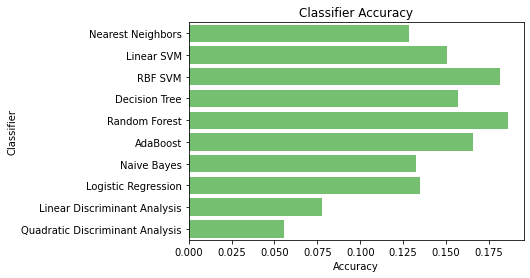

                        Classifier  Accuracy
0                Nearest Neighbors  0.134956
1                       Linear SVM  0.112832
2                          RBF SVM  0.181416
3                    Decision Tree  0.115044
4                    Random Forest  0.152655
5                         AdaBoost  0.128319
6                      Naive Bayes  0.050885
7              Logistic Regression  0.115044
8     Linear Discriminant Analysis  0.066372
9  Quadratic Discriminant Analysis  0.081858


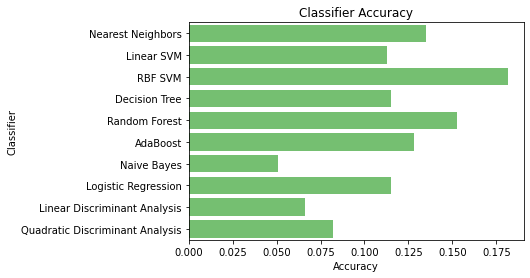

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

####################
#       LDA        #
####################

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Logistic Regression", 
         "Linear Discriminant Analysis", "Quadratic Discriminant Analysis"]
         
classifiers = [
    KNeighborsClassifier(8),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    #RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    #GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
]

log_cols = ["Classifier", "Accuracy"]
vgg_log = pd.DataFrame(columns=log_cols)
inception_log = pd.DataFrame(columns=log_cols)

for i in range(0, len(classifiers)):
#for classifier in classifiers:
    #classifier.fit(train_data_EI, train_label_EI)
    #predict_EI = classifier.predict(test_data_EI)
    #print(accuracy_score(test_label_EI, predict_EI))

    classifier = classifiers[i]
    classifier.fit(vgg_train_data_MBTI, vgg_train_label_MBTI)
    vgg_predict_MBTI = classifier.predict(vgg_test_data_MBTI)
    classifier.fit(inception_train_data_MBTI, inception_train_label_MBTI)
    inception_predict_MBTI = classifier.predict(inception_test_data_MBTI)

    vgg_score = accuracy_score(vgg_test_label_MBTI, vgg_predict_MBTI)
    inception_score = accuracy_score(inception_test_label_MBTI, inception_predict_MBTI)

    vgg_log_entry = pd.DataFrame([[names[i], vgg_score]], columns=log_cols)
    inception_log_entry = pd.DataFrame([[names[i], inception_score]], columns=log_cols)
    vgg_log = vgg_log.append(vgg_log_entry, ignore_index=True)
    inception_log = inception_log.append(inception_log_entry, ignore_index=True)

print(vgg_log)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=vgg_log, color="g")  
plt.show()

print(inception_log)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=inception_log, color="g")  
plt.show()

#lda = LinearDiscriminantAnalysis()
#lda2 = LinearDiscriminantAnalysis()

#lda.fit(train_data_EI, train_label_EI)
#lda_predict_EI = lda.predict(test_data_EI)
#print(accuracy_score(test_label_EI, lda_predict_EI))

#lda2.fit(train_data_MBTI, train_label_MBTI)
#lda2_predict_MBTI = lda2.predict(test_data_MBTI)
#print(accuracy_score(test_label_MBTI, lda2_predict_MBTI))